In [112]:
import os,struct

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [138]:
BASE_PATH = './data/etl7'
UNPACK_STRING = '>H2sH6BI4H4B4x2016s4x'
FILES = ['ETL7LC_1']
RECORDS_NB = [9600, 7200, 9600, 7200]
RECORD_LENGTH = 2052 # bytes
WIDTH = 64
HEIGHT = 63
COLUMNS_LABELS = ['index','character_name','phonetic','sheet_index','image_quality','group_quality','writer_gender','writer_age','date_of_scan','x_pos','y_pos','image_data']

In [139]:
records_list = []

In [140]:
for filename in FILES:
    file_index = FILES.index(filename)
    records_nb = RECORDS_NB[file_index]
    count = 0
    f = open(f'{BASE_PATH}/{filename}', 'rb')

    while count <= records_nb:
        record_string = f.read(RECORD_LENGTH)

        if len(record_string) < RECORD_LENGTH:
            break
            
        record = struct.unpack(UNPACK_STRING, record_string)
        phonetic = record[1].decode('ascii')
        base_date = str(record[13])
        date_of_scan = f'{base_date[2:]}-19{base_date[:2]}' # 7708 -> 08-1977
        record_data = [record[0],record[1],phonetic,record[2],record[5],record[6],record[7],record[8],date_of_scan,record[14],record[15],record[18]]
        records_list.append(record_data)     
        count+=1

    f.close()

In [141]:
len(records_list) == sum(RECORDS_NB)

False

In [142]:
df = pd.DataFrame(records_list, columns=COLUMNS_LABELS)
df.head()

,index,character_name,phonetic,sheet_index,image_quality,group_quality,writer_gender,writer_age,date_of_scan,x_pos,y_pos,image_data
0,1,b' A',A,1,0,0,1,23,08-1977,1,1,"b'2#3\x133#""""!""""""2#\x12""3""23\x122#""\x13\x123""3..."
1,2,b' A',A,2,0,0,1,23,08-1977,4,1,"b'3334332""#3""2C""#2#""!3""2#""""""""""23C233CC33C33322..."
2,3,b' A',A,3,0,0,1,23,08-1977,1,1,"b'32333333#22""3""2""#2""#""2#2""#33#3332233#233""22\..."
3,4,b' A',A,4,0,0,1,23,08-1977,4,1,"b'C4B33332232#33##3""###3""2#3243333D3C433#2232$..."
4,5,b' A',A,5,0,0,1,22,08-1977,1,1,"b'2223""2!""""""!""#""""""22""""\x12!""!!""#\x12""""23312#""""..."


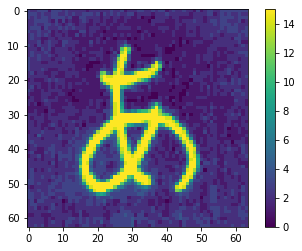

In [144]:
img = np.array(Image.frombytes('F', (WIDTH, HEIGHT), df['image_data'][0], 'bit', 4))
plt.imshow(img)
plt.colorbar()